# Case Studies
●	Visuals Depicting the Number of Bird Strikes

●	Yearly Analysis & Bird Strikes in the US

●	Top 10 US Airlines in terms of having encountered bird strikes

●	Airports with most incidents of bird strikes – Top 50

● Yearly Cost Incurred due to Bird Strikes:

●	When do most bird strikes occur?

● Altitude of aeroplanes at the time of strike

● Phase of flight at the time of the strike.

●	Average Altitude of the aeroplanes in different phases at the time of strike

●	Effect of Bird Strikes & Impact on Flight

●	Effect of Strike at Different Altitude

●	Were Pilots Informed? & Prior Warning and Effect of Strike Relation Dataset:


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat

In [2]:

import pandas as pd

pd.set_option('display.max_columns', 50)

#import in the bird strikes data set and look at the first 5 rows of data, thousands=',' will convert strings with commas (currency) to numeric
bird_strikes = pd.read_excel('/content/Bird Strikes data.xlsx')
bird_strikes.head()


,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


In [3]:
bird_strikes.dtypes

Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                            object
Wildlife: Number Struck Actual                      int64
Effect: Impact to flight                           object
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Number of engines?                       object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Conditions: Precipitation                          object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Remarks       

In [4]:
# ● Visuals Depicting the Number of Bird Strikes
Number_of_Bird_Strikes = bird_strikes['Wildlife: Number Struck Actual'].value_counts()
Number_of_Bird_Strikes

Wildlife: Number Struck Actual
1      20915
5        536
7        496
9        487
4        484
       ...  
55         1
12         1
100        1
424        1
859        1
Name: count, Length: 106, dtype: int64

In [5]:
bird_strikes.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [6]:
# ● Yearly Analysis & Bird Strikes in the US
bird_strikes['Wildlife: Number struck'].value_counts()

Wildlife: Number struck
1            20790
2 to 10       4319
11 to 100      312
Over 100         8
Name: count, dtype: int64

    Aircraft: Airline/Operator  US AIRWAYS
250         SOUTHWEST AIRLINES        4628
69                    BUSINESS        3074
45           AMERICAN AIRLINES        2058
112            DELTA AIR LINES        1349
46     AMERICAN EAGLE AIRLINES         932
246           SKYWEST AIRLINES         891
274                US AIRWAYS*         797
166            JETBLUE AIRWAYS         708
272               UPS AIRLINES         590
273                 US AIRWAYS         540


<ipython-input-7-ece9f24d8875>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='US AIRWAYS', y='Aircraft: Airline/Operator', data=top_10_airlines, palette='viridis')


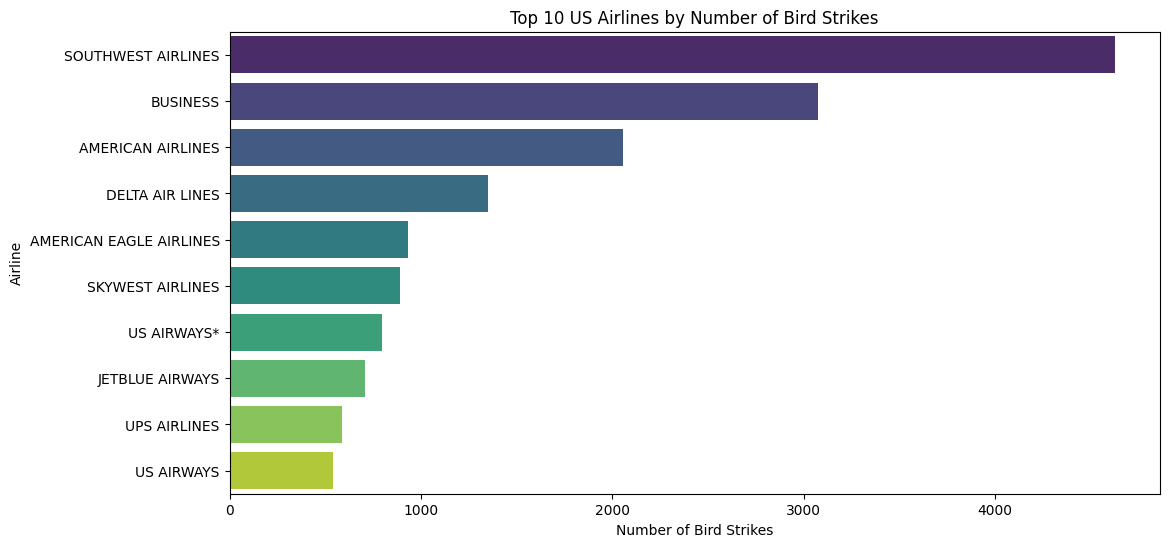

In [7]:
# ● Top 10 US Airlines in terms of having encountered bird strikes

# Display the first few rows to understand the structure of the data
bird_strikes.head()

# Group by airline and count the number of bird strikes
bird_strikes_count = bird_strikes.groupby('Aircraft: Airline/Operator').size().reset_index(name='US AIRWAYS')

# Sort the data to get the top 10 airlines
top_10_airlines = bird_strikes_count.sort_values(by='US AIRWAYS', ascending=False).head(10)

# Display the top 10 airlines
print(top_10_airlines)

# Plotting the top 10 airlines
plt.figure(figsize=(12, 6))
sns.barplot(x='US AIRWAYS', y='Aircraft: Airline/Operator', data=top_10_airlines, palette='viridis')
plt.title('Top 10 US Airlines by Number of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airline')
plt.show()

                               Airport: Name  bird_strikes
208              DALLAS/FORT WORTH INTL ARPT           803
875                          SACRAMENTO INTL           676
882                      SALT LAKE CITY INTL           479
232                      DENVER INTL AIRPORT           476
497                         KANSAS CITY INTL           452
783                        PHILADELPHIA INTL           442
749                             ORLANDO INTL           408
52                       BALTIMORE WASH INTL           401
579                     LOUISVILLE INTL ARPT           395
479                      JOHN F KENNEDY INTL           390
144              CHARLOTTE/DOUGLAS INTL ARPT           367
696                           NASHVILLE INTL           364
539                    LAMBERT-ST LOUIS INTL           363
156                 CHICAGO O'HARE INTL ARPT           332
235          DETROIT METRO WAYNE COUNTY ARPT           321
802                       PORTLAND INTL (OR)           3

<ipython-input-31-2a63e43293f6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


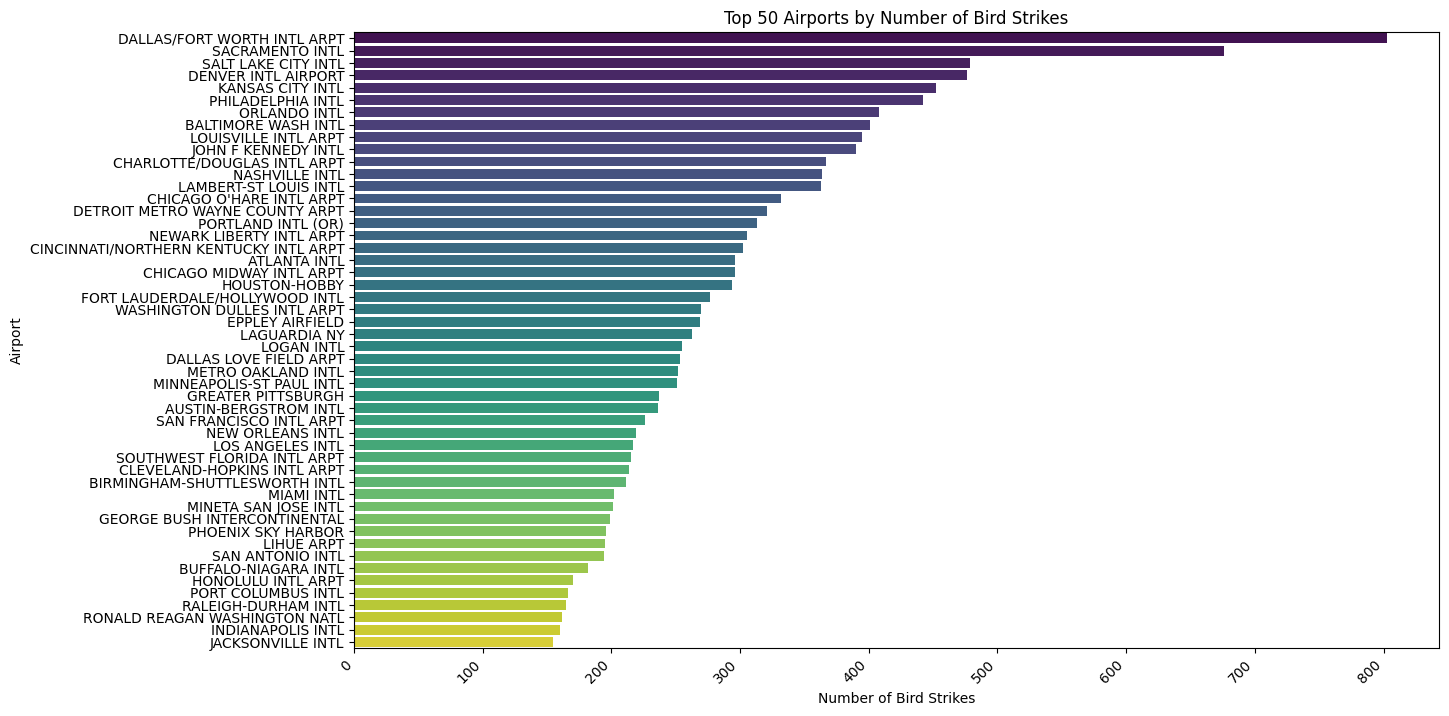

In [31]:
# Airports with most incidents of bird strikes – Top 50

# Display the first few rows to understand the structure of the data
bird_strikes.head()

# Group by airport and count the number of bird strikes
airport_strikes_count = bird_strikes.groupby('Airport: Name').size().reset_index(name='bird_strikes')

# Sort the data to get the top 50 airports
top_50_airports = airport_strikes_count.sort_values(by='bird_strikes', ascending=False).head(50)

# Display the top 50 airports
print(top_50_airports)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar chart
sns.barplot(
    x='bird_strikes',
    y='Airport: Name',
    data=top_50_airports,
    palette='viridis'
)

# Set the title and labels
plt.title('Top 50 Airports by Number of Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the bar chart
plt.show()


      Year  Cost: Total $
0   2000.0        5625496
1   2001.0       23252168
2   2002.0        9046405
3   2003.0       13176787
4   2004.0        8116866
5   2005.0        7026670
6   2006.0       18309903
7   2007.0       10822426
8   2008.0       11966121
9   2009.0        9564327
10  2010.0       11459879
11  2011.0       13180130


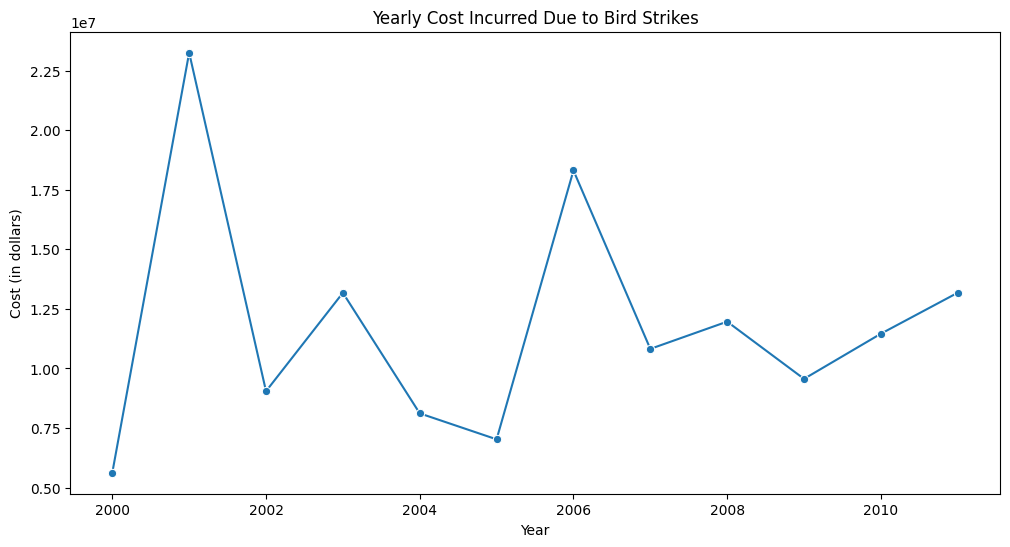

In [33]:
# Yearly Cost Incurred due to Bird Strikes:
# Display the first few rows to understand the structure of the data
bird_strikes.head()

# Ensure 'FlightDate' is in datetime format
bird_strikes['FlightDate'] = pd.to_datetime(bird_strikes['FlightDate'])

# Extract the year from the 'FlightDate' column
bird_strikes['Year'] = bird_strikes['FlightDate'].dt.year

# Group by year and sum the costs
yearly_cost = bird_strikes.groupby('Year')['Cost: Total $'].sum().reset_index()

# Display the yearly costs
print(yearly_cost)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(data=yearly_cost, x='Year', y='Cost: Total $', marker='o')

# Set the title and labels
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Cost (in dollars)')

# Display the plot
plt.show()


    Month  bird_strikes
0     1.0           937
1     2.0           772
2     3.0          1233
3     4.0          1828
4     5.0          2318
5     6.0          2078
6     7.0          3278
7     8.0          3710
8     9.0          3417
9    10.0          3038
10   11.0          1801
11   12.0          1019


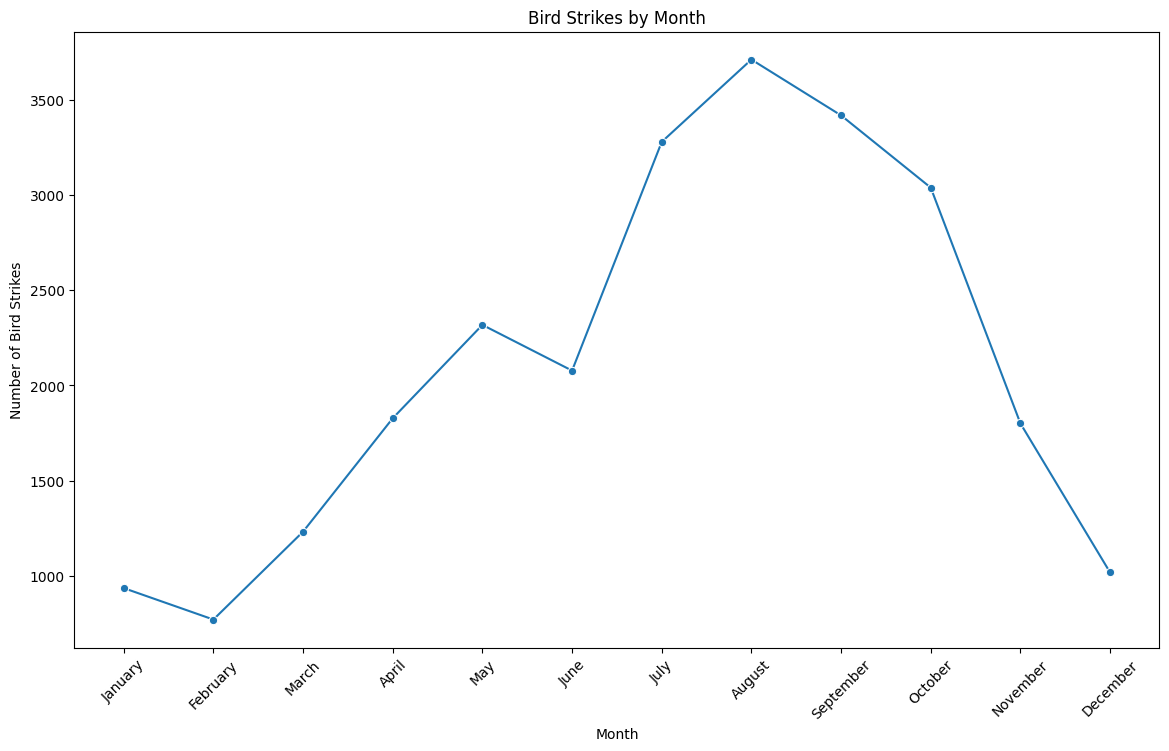

In [36]:
# When do most bird strikes occur?
# Ensure 'FlightDate' is in datetime format
bird_strikes['FlightDate'] = pd.to_datetime(bird_strikes['FlightDate'])

# Extract the month from the 'FlightDate' column
bird_strikes['Month'] = bird_strikes['FlightDate'].dt.month

# Group by month and count the number of bird strikes
monthly_strikes_count = bird_strikes.groupby('Month').size().reset_index(name='bird_strikes')

# Display the monthly bird strikes count
print(monthly_strikes_count)

# Create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map the month numbers to names
monthly_strikes_count['Month'] = monthly_strikes_count['Month'].map(month_names)

# Sort the data by month number to ensure the plot is in chronological order
monthly_strikes_count['Month'] = pd.Categorical(monthly_strikes_count['Month'], categories=list(month_names.values()), ordered=True)
monthly_strikes_count = monthly_strikes_count.sort_values('Month')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a line plot
sns.lineplot(data=monthly_strikes_count, x='Month', y='bird_strikes', marker='o', sort=False)

# Set the title and labels
plt.title('Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



<ipython-input-39-7727e9b6d6d0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bird_strikes, x='Month', y='Altitude bin', palette='viridis')


<Figure size 1400x800 with 0 Axes>

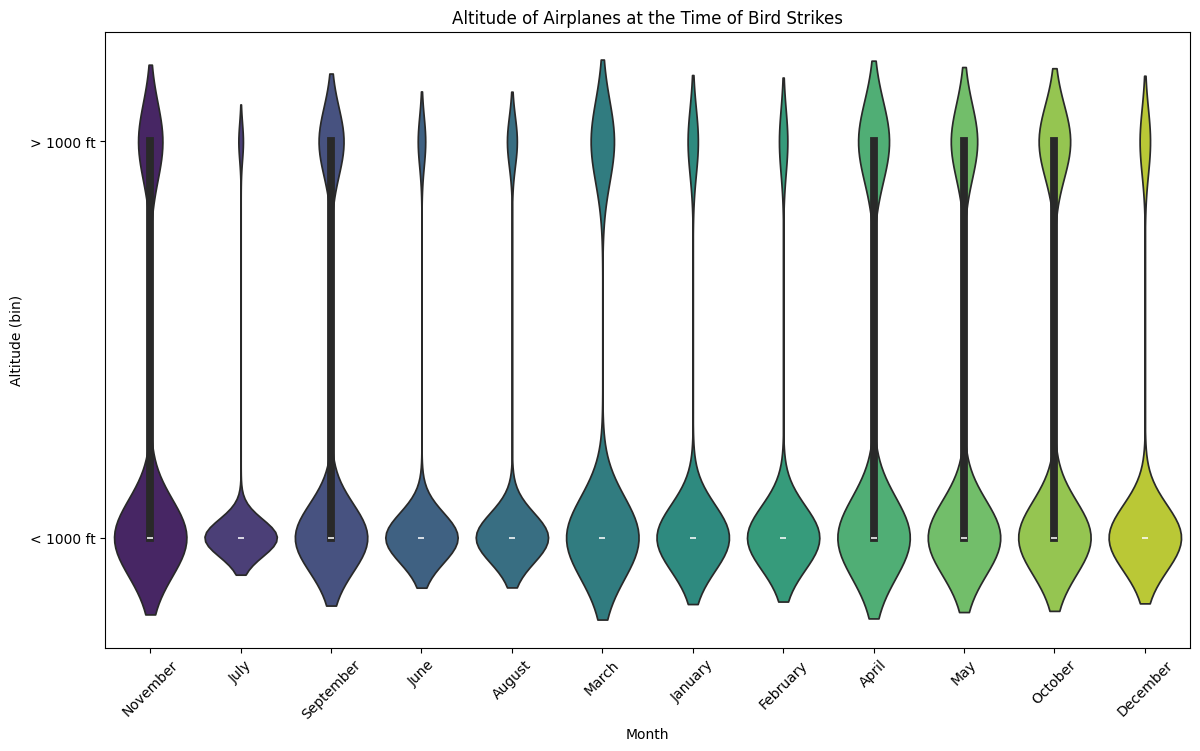

In [39]:
# Altitude of aeroplanes at the time of strike
# Ensure 'FlightDate' is in datetime format
bird_strikes['FlightDate'] = pd.to_datetime(bird_strikes['FlightDate'])

# Extract the month from the 'FlightDate' column
bird_strikes['Month'] = bird_strikes['FlightDate'].dt.month_name()

# Display the first few rows to understand the structure of the data
bird_strikes.head()

# Ensure that the necessary columns exist in the dataset
if 'Month' in bird_strikes.columns and 'Altitude bin' in bird_strikes.columns:
    # Set the figure size
    plt.figure(figsize=(14, 8))

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a violin plot
sns.violinplot(data=bird_strikes, x='Month', y='Altitude bin', palette='viridis')

# Set the title and labels
plt.title('Altitude of Airplanes at the Time of Bird Strikes')
plt.xlabel('Month')
plt.ylabel('Altitude (bin)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



<ipython-input-13-fabbd39f8030>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='When: Phase of flight', y='Wildlife: Number Struck Actual', data=bird_strikes, palette='viridis')


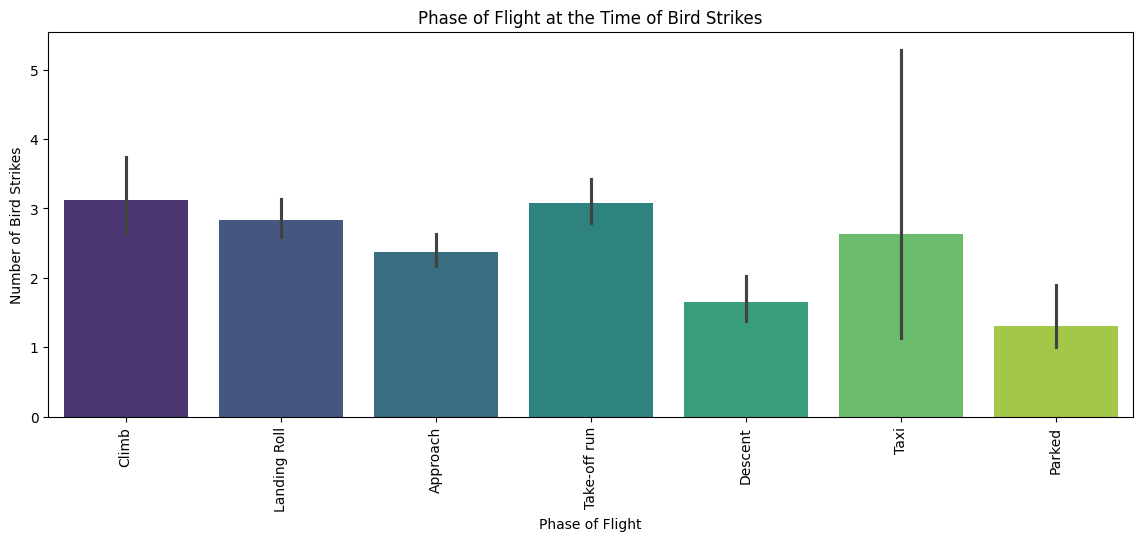

In [13]:
# Phase of flight at the time of the strike.

# Set the plot size
plt.figure(figsize=(14, 5))

# Create a bar plot
sns.barplot(x='When: Phase of flight', y='Wildlife: Number Struck Actual', data=bird_strikes, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Phase of Flight at the Time of Bird Strikes')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')

# Display the plot
plt.show()



In [14]:
# ● Average Altitude of the aeroplanes in different phases at the time of strike

# Display the first few rows to understand the structure of the data
bird_strikes.head()

# Check for missing values in the relevant columns
print(bird_strikes[['When: Phase of flight', 'Feet above ground']].isnull().sum())

# Drop rows with missing values in the relevant columns
df_cleaned = bird_strikes.dropna(subset=['When: Phase of flight', 'Feet above ground'])

# Group by 'When: Phase of flight' and calculate the average altitude
average_altitude = bird_strikes.groupby('When: Phase of flight')['Feet above ground'].mean().reset_index()

# Rename columns for better readability
average_altitude.columns = ['Phase of Flight', 'Average Altitude (Feet)']

# Display the result
print(average_altitude)



When: Phase of flight    129
Feet above ground        129
dtype: int64
  Phase of Flight  Average Altitude (Feet)
0        Approach              1001.733385
1           Climb              1199.654324
2         Descent              5933.960052
3    Landing Roll                 0.000000
4          Parked                 0.000000
5    Take-off run                 0.101040
6            Taxi                 0.000000


Effect: Impact to flight    23480
Effect: Indicated Damage        0
When: Phase of flight         129
dtype: int64


<ipython-input-42-921de0117d61>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Phase of Flight', y='Number of Strikes', data=phase_counts, palette='viridis')
<ipython-input-42-921de0117d61>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Impact to Flight', y='Number of Strikes', data=impact_counts, palette='viridis')
<ipython-input-42-921de0117d61>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='Indicated Damage', y='Number of Strikes', data=damage_counts, palette='viridis')


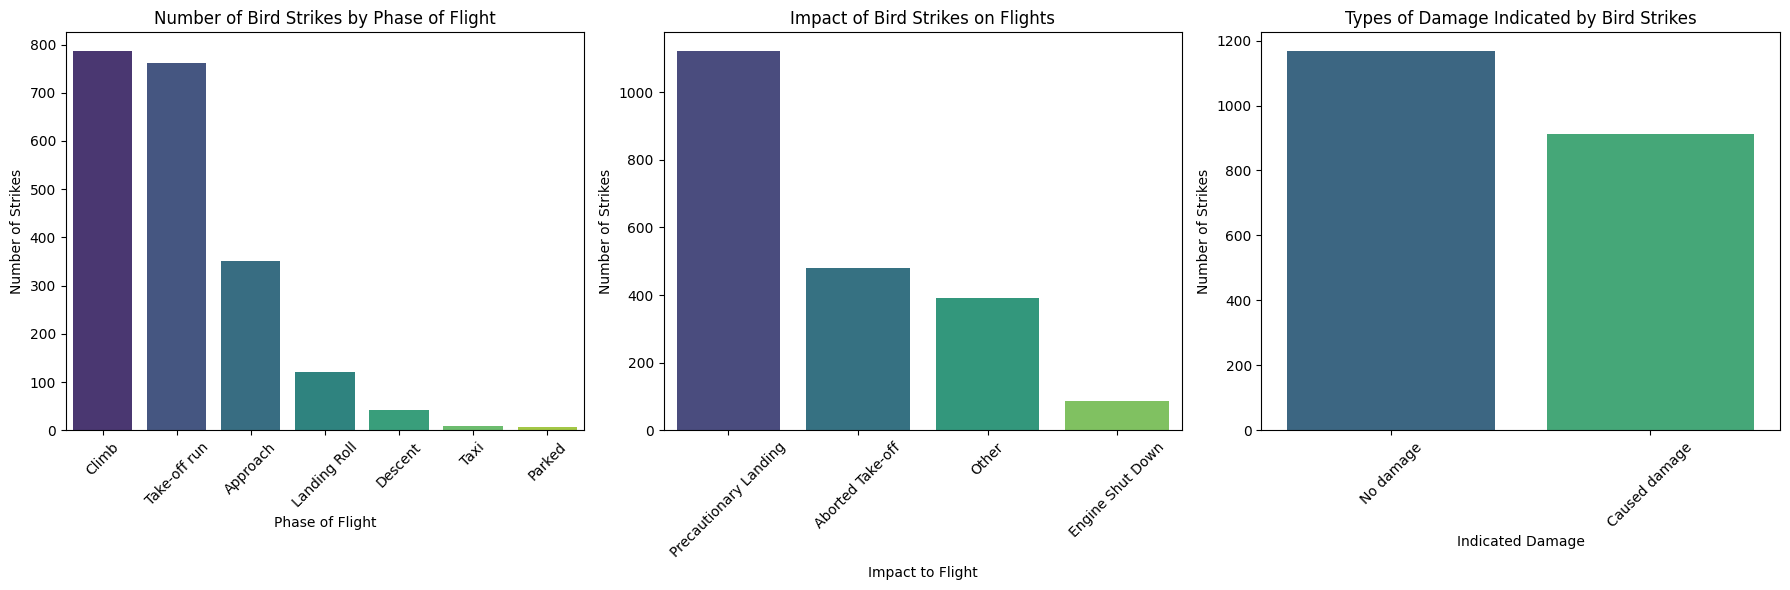

In [42]:
# ●	Effect of Bird Strikes & Impact on Flight
# Ensure 'FlightDate' is in datetime format
bird_strikes['FlightDate'] = pd.to_datetime(bird_strikes['FlightDate'])
# Check for missing values in relevant columns
print(bird_strikes[['Effect: Impact to flight', 'Effect: Indicated Damage', 'When: Phase of flight']].isnull().sum())
# Drop rows with missing values in the relevant columns
df_cleaned = bird_strikes.dropna(subset=['Effect: Impact to flight', 'Effect: Indicated Damage', 'When: Phase of flight'])
# Analyze the number of bird strikes by phase of flight
phase_counts = df_cleaned['When: Phase of flight'].value_counts().reset_index()
phase_counts.columns = ['Phase of Flight', 'Number of Strikes']
# Analyze the impact of bird strikes on flights
impact_counts = df_cleaned['Effect: Impact to flight'].value_counts().reset_index()
impact_counts.columns = ['Impact to Flight', 'Number of Strikes']
# Analyze the types of damage indicated
damage_counts = df_cleaned['Effect: Indicated Damage'].value_counts().reset_index()
damage_counts.columns = ['Indicated Damage', 'Number of Strikes']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the number of bird strikes by phase of flight
sns.barplot(ax=axes[0], x='Phase of Flight', y='Number of Strikes', data=phase_counts, palette='viridis')
axes[0].set_title('Number of Bird Strikes by Phase of Flight')
axes[0].tick_params(axis='x', rotation=45)

# Plot the impact of bird strikes on flights
sns.barplot(ax=axes[1], x='Impact to Flight', y='Number of Strikes', data=impact_counts, palette='viridis')
axes[1].set_title('Impact of Bird Strikes on Flights')
axes[1].tick_params(axis='x', rotation=45)

# Plot the types of damage indicated
sns.barplot(ax=axes[2], x='Indicated Damage', y='Number of Strikes', data=damage_counts, palette='viridis')
axes[2].set_title('Types of Damage Indicated by Bird Strikes')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                      NaN 2001-07-25   
2                             261        

<ipython-input-16-fc92b0069c7b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Altitude bin'] = pd.cut(df_cleaned['Feet above ground'], bins=bins, labels=labels)


<Figure size 1200x800 with 0 Axes>

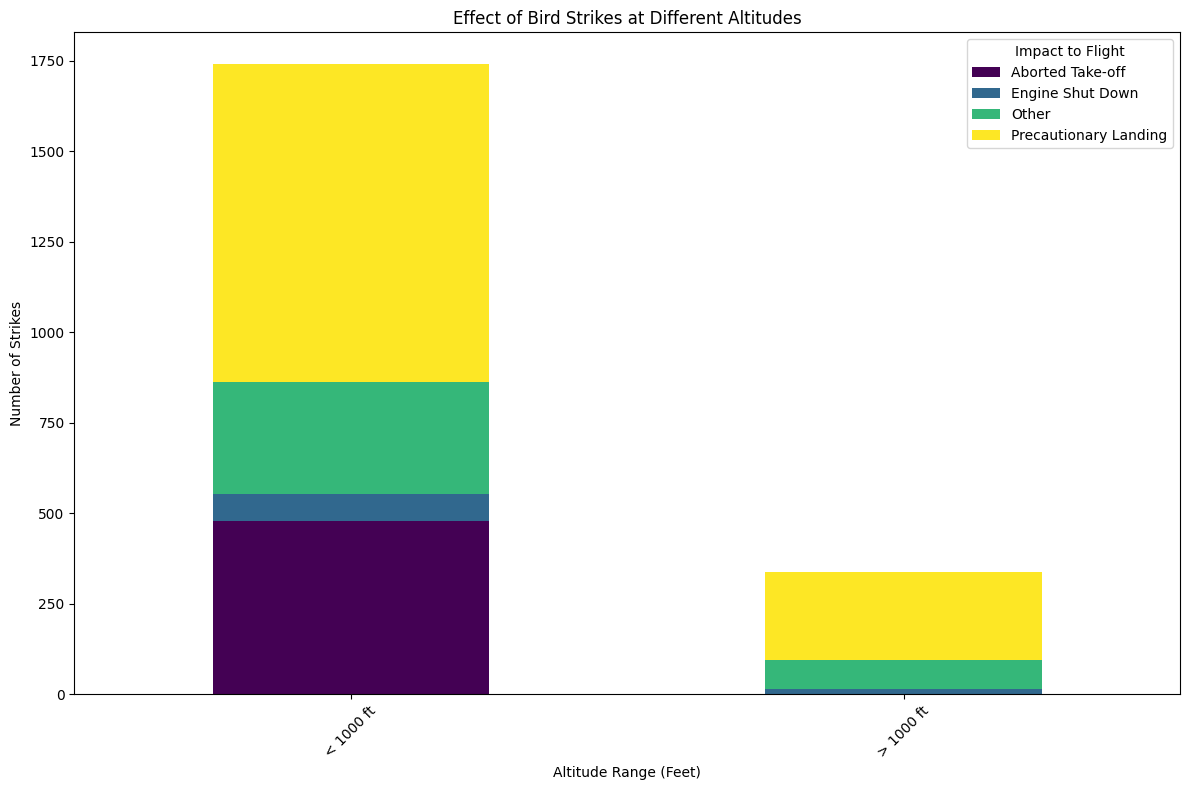

In [16]:
# ● Effect of Strike at Different Altitude

# Inspect the first few rows of the dataframe
print(bird_strikes.head())

# Check for missing values in relevant columns
print(bird_strikes[['Feet above ground', 'Effect: Impact to flight']].isnull().sum())

# Drop rows with missing values in the relevant columns
df_cleaned = bird_strikes.dropna(subset=['Feet above ground', 'Effect: Impact to flight'])

# Create altitude bins
bins = [0, 1000, 5000, 10000, 20000, 30000, 40000]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k']
df_cleaned['Altitude bin'] = pd.cut(df_cleaned['Feet above ground'], bins=bins, labels=labels)

# Analyze the impact of bird strikes at different altitudes
altitude_impact_counts = bird_strikes.groupby(['Altitude bin', 'Effect: Impact to flight']).size().unstack().fillna(0)

# Visualize the impact of bird strikes at different altitudes
plt.figure(figsize=(12, 8))
altitude_impact_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Altitude Range (Feet)')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.legend(title='Impact to Flight')
plt.tight_layout()
plt.show()


   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                      NaN 2001-07-25   
2                             261        

<Figure size 1200x800 with 0 Axes>

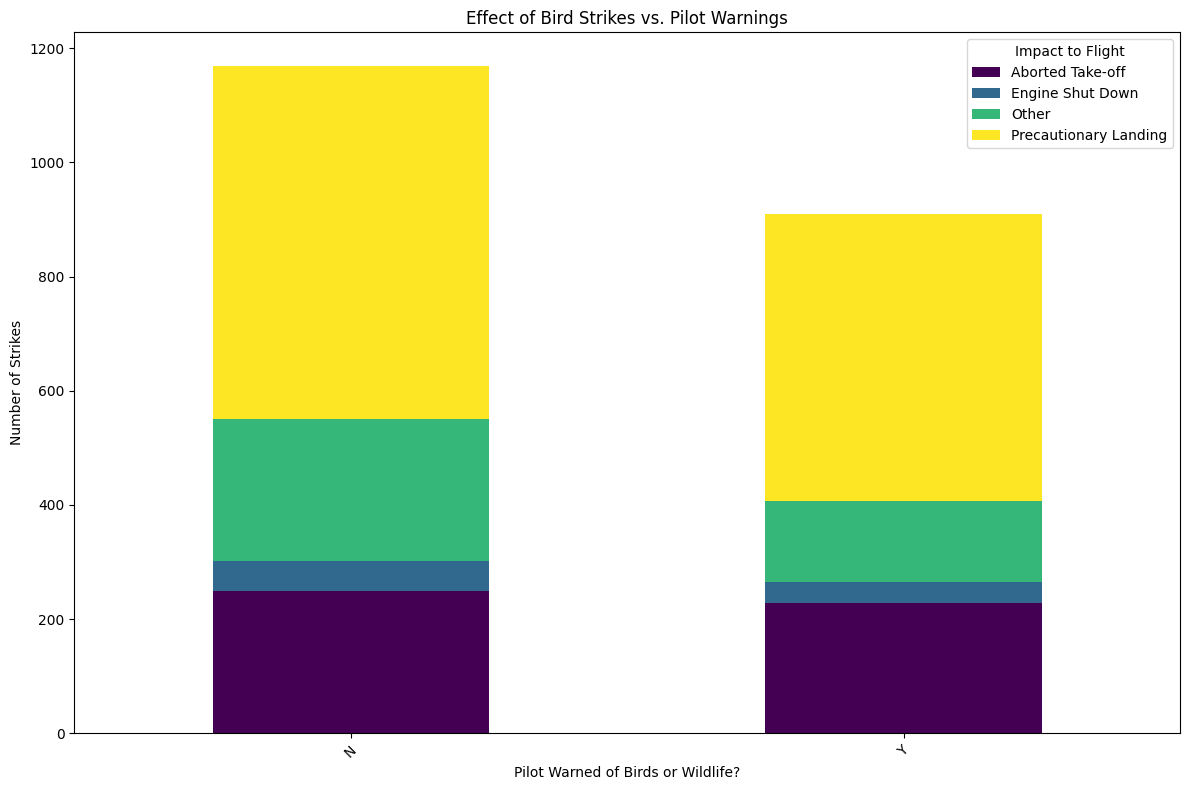

In [17]:
# ● Were Pilots Informed? & Prior Warning and Effect of Strike Relation Dataset:

# Inspect the first few rows of the dataframe
print(bird_strikes.head())

# Check for missing values in relevant columns
print(bird_strikes[['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']].isnull().sum())

# Drop rows with missing values in the relevant columns
df_cleaned = bird_strikes.dropna(subset=['Pilot warned of birds or wildlife?', 'Effect: Impact to flight'])

# Analyze the relationship between pilot warning and effect of strike
warning_effect_counts = bird_strikes.groupby(['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']).size().unstack().fillna(0)

# Visualize the relationship between pilot warning and effect of strike
plt.figure(figsize=(12, 8))
warning_effect_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Effect of Bird Strikes vs. Pilot Warnings')
plt.xlabel('Pilot Warned of Birds or Wildlife?')
plt.ylabel('Number of Strikes')
plt.xticks(rotation=45)
plt.legend(title='Impact to Flight')
plt.tight_layout()
plt.show()
